# Notebook by: Akua Morgan

# Machine Learning Assignment: predicting whether or not it will rain tomorrow 
# a use case on Australia's weather over a ten year period

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #to supress the warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)
import seaborn as sns
%matplotlib inline

In [2]:
#loading data
weatherAUS = pd.read_csv('weatherAUS.csv')
weatherAUS.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
#knowing number of rows and columns 
weatherAUS.shape

(145460, 23)

In [4]:
#knowing datatypes of the variables
weatherAUS.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [5]:
#checking for null values
weatherAUS.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

# Visualisation of data

A catplot to visualise some pairs of features in relation to the target variable. This will enable me to know which ones i can sum up to trim down the feature set. E.g. if trend for Humidity recordings at 9am is no different from Humidity recording at 3pm, i will sum up the two columns. Sum up variables with similar trends in relation to the target variables will reduce the number of features the model will have to look at

<Figure size 432x288 with 0 Axes>

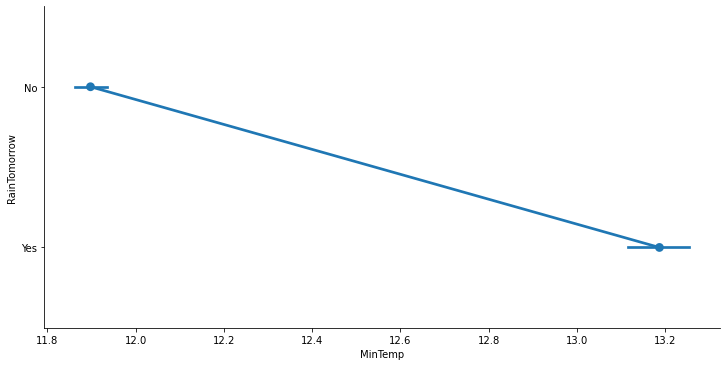

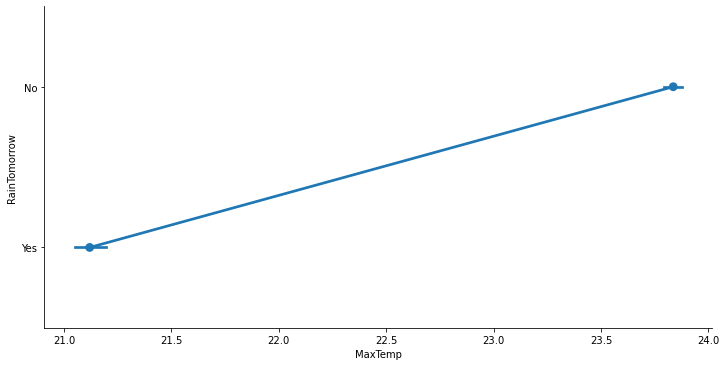

In [6]:
#A catplot indicates different signifcant trends between the 
#MinTemp in relation to RainTomorrow likewise with the MaxTemp variable.
#so i cannot merge the two variables
for i, col in enumerate(['MinTemp','MaxTemp']):
    plt.figure(i)
    sns.catplot(x=col,y='RainTomorrow',data=weatherAUS,kind='point',aspect = 2)

<Figure size 432x288 with 0 Axes>

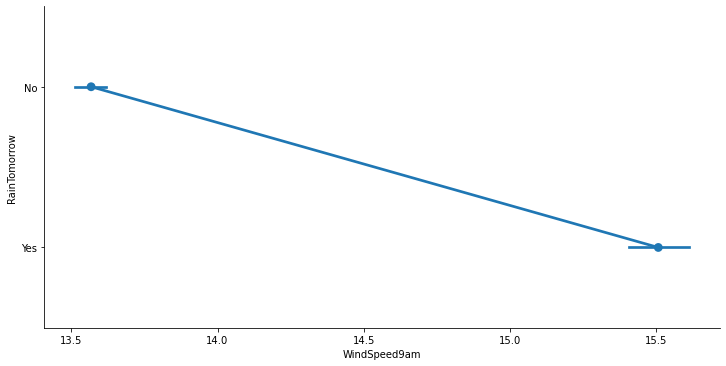

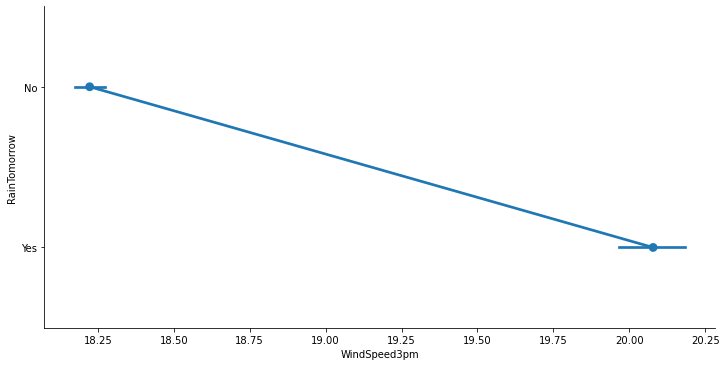

In [7]:
#Exploring WindSpeed9am and WindSpeed3pm variables
#catplot shows the same trend for both variables in relation to the target variable
for i, col in enumerate(['WindSpeed9am','WindSpeed3pm']):
    plt.figure(i)
    sns.catplot(x=col,y='RainTomorrow',data=weatherAUS,kind='point',aspect = 2)

<Figure size 432x288 with 0 Axes>

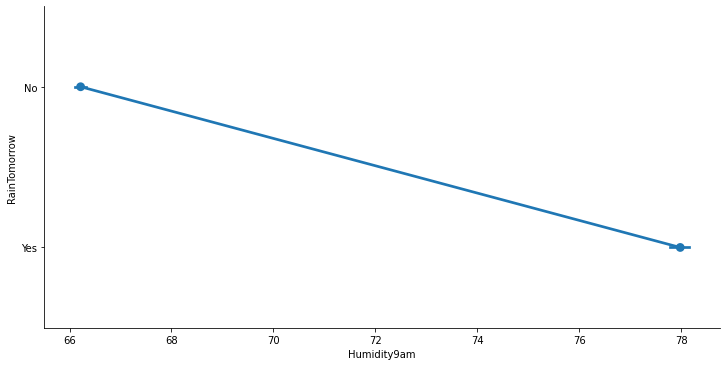

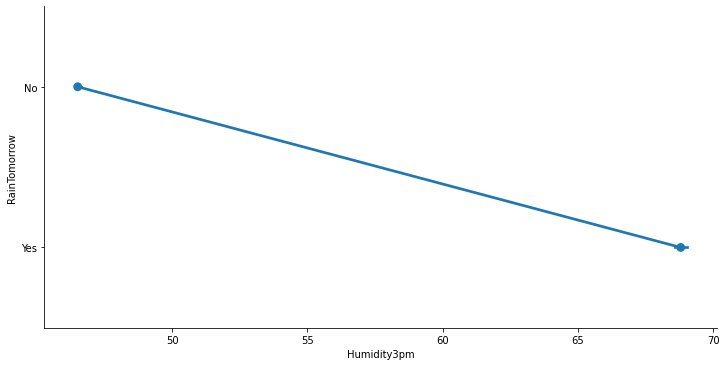

In [8]:
#Exploring Humidity9am and Humidity3pm variables
#catplot shows the same trend for both variables in relation to the target variable
for i, col in enumerate(['Humidity9am','Humidity3pm']):
    plt.figure(i)
    sns.catplot(x=col,y='RainTomorrow',data=weatherAUS,kind='point',aspect = 2)

<Figure size 432x288 with 0 Axes>

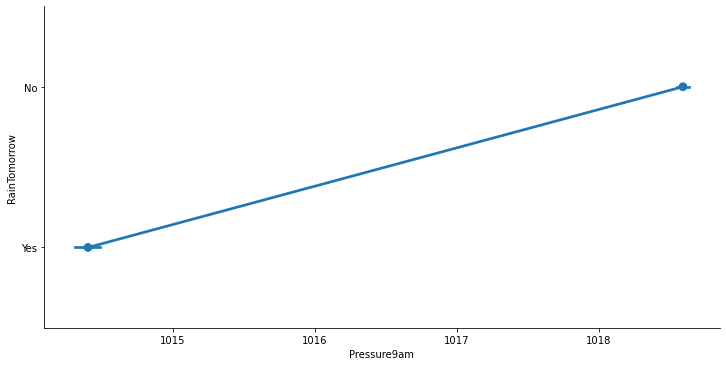

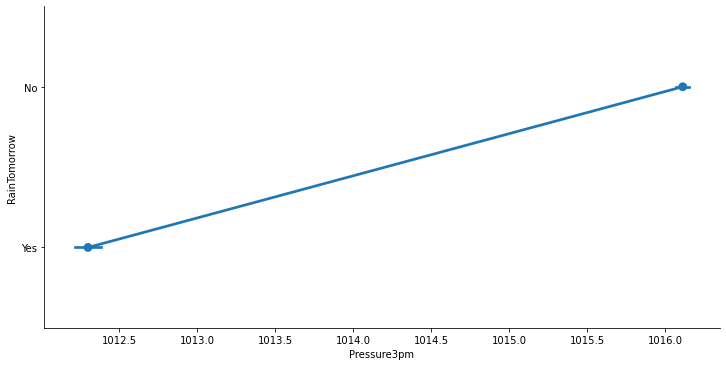

In [9]:
#Exploring Pressure9am and Pressure3pm variables
#catplot shows the same trend for both variables in relation to the target variable
for i, col in enumerate(['Pressure9am','Pressure3pm']):
    plt.figure(i)
    sns.catplot(x=col,y='RainTomorrow',data=weatherAUS,kind='point',aspect = 2)

<Figure size 432x288 with 0 Axes>

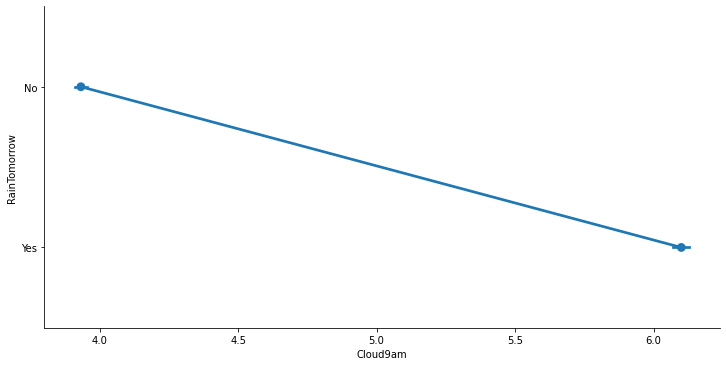

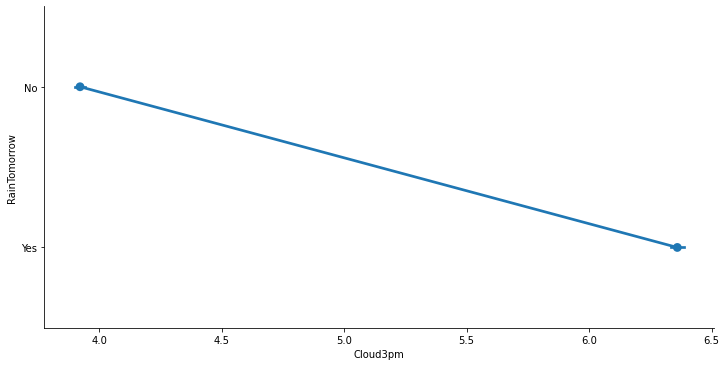

In [10]:
#Exploring Cloud9am and Cloud3pm variables
#catplot shows the same trend for both variables in relation to the target variable
for i, col in enumerate(['Cloud9am','Cloud3pm']):
    plt.figure(i)
    sns.catplot(x=col,y='RainTomorrow',data=weatherAUS,kind='point',aspect = 2)

<Figure size 432x288 with 0 Axes>

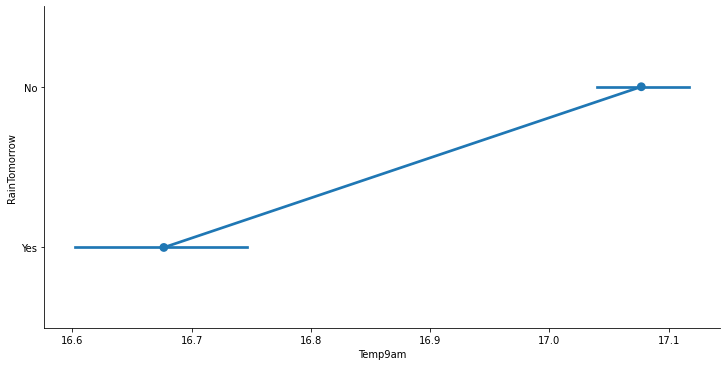

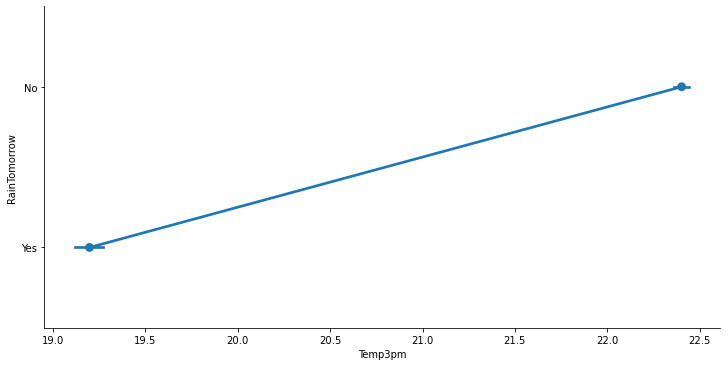

In [11]:
#Exploring Temp9am and Temp3pm variables
#catplot shows the same trend for both variables in relation to the target variable
for i, col in enumerate(['Temp9am','Temp3pm']):
    plt.figure(i)
    sns.catplot(x=col,y='RainTomorrow',data=weatherAUS,kind='point',aspect = 2)

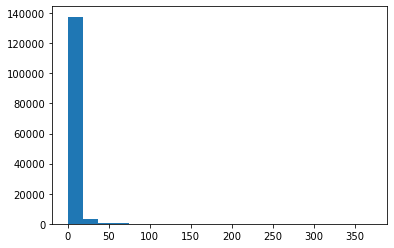

In [12]:
#visualising data distribution of Rainfall variable
plt.hist(weatherAUS['Rainfall'], bins = 20)
plt.show()

Merging the variables with similar trends in relation to the target variables

In [13]:
#Merging variables with similar characteristics into new features
weatherAUS['WindSpeed'] = weatherAUS['WindSpeed9am'] + weatherAUS['WindSpeed3pm']
weatherAUS['Humidity'] = weatherAUS['Humidity9am'] + weatherAUS['Humidity3pm']
weatherAUS['Pressure'] = weatherAUS['Pressure9am'] + weatherAUS['Pressure3pm']
weatherAUS['Cloud'] = weatherAUS['Cloud9am'] + weatherAUS['Cloud3pm']
weatherAUS['Temperature'] = weatherAUS['Temp9am'] + weatherAUS['Temp3pm']

# Dropping Some features

In [14]:
#drop the variables that were merged
weatherAUS.drop(['WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm'], axis=1,inplace=True)
weatherAUS.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,WindSpeed,Humidity,Pressure,Cloud,Temperature
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,No,No,44.0,93.0,2014.8,NaN,38.7
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,No,No,26.0,69.0,2018.4,NaN,41.5
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,No,No,45.0,68.0,2016.3,NaN,44.2
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,No,No,20.0,61.0,2030.4,NaN,44.6
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,No,No,27.0,115.0,2016.8,15.0,47.5


Drop the Date and location columns because the date repeats itself for all the cities for a 10 year period
and locations is the name of the cities.
These two variables have the Rainfall values recorded. dropping them wont have any significant effect on the model

In [15]:
#Drop the Date and Location variables
weatherAUS.drop(['Date','Location'], axis=1,inplace=True)
weatherAUS.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,WindSpeed,Humidity,Pressure,Cloud,Temperature
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,No,No,44.0,93.0,2014.8,NaN,38.7
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,No,No,26.0,69.0,2018.4,NaN,41.5
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,No,No,45.0,68.0,2016.3,NaN,44.2
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,No,No,20.0,61.0,2030.4,NaN,44.6
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,No,No,27.0,115.0,2016.8,15.0,47.5


Wind directions in itself will not determine if it is going to rain or not but probably where (location) it is going to rain.
Since where it is going to rain is not out target, i will drop them.
Also exploring the data, most missing values in the Speed variables have their corresponding Dir values also missed. there must be some relationship
therefore the speed variables can make up for any loss caused by dropping the Dir variables

In [16]:
#Drop the WindGustDir, WindDir9am and WindDir3pm
weatherAUS.drop(['WindGustDir','WindDir9am','WindDir3pm'], axis=1,inplace=True)
weatherAUS.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,RainToday,RainTomorrow,WindSpeed,Humidity,Pressure,Cloud,Temperature
0,13.4,22.9,0.6,NaN,NaN,44.0,No,No,44.0,93.0,2014.8,NaN,38.7
1,7.4,25.1,0.0,NaN,NaN,44.0,No,No,26.0,69.0,2018.4,NaN,41.5
2,12.9,25.7,0.0,NaN,NaN,46.0,No,No,45.0,68.0,2016.3,NaN,44.2
3,9.2,28.0,0.0,NaN,NaN,24.0,No,No,20.0,61.0,2030.4,NaN,44.6
4,17.5,32.3,1.0,NaN,NaN,41.0,No,No,27.0,115.0,2016.8,15.0,47.5


Evaporation and Sunshine missing values were not missing at random. it maybe due to location, date or some factors not explained. however, i am dropping them because they have Rainfall recordings that may probably make up for the loss in dropping the two features

In [17]:
#dropping Evaporation and Sunshine features
weatherAUS.drop(['Evaporation','Sunshine'], axis=1,inplace=True)
weatherAUS.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,RainToday,RainTomorrow,WindSpeed,Humidity,Pressure,Cloud,Temperature
0,13.4,22.9,0.6,44.0,No,No,44.0,93.0,2014.8,NaN,38.7
1,7.4,25.1,0.0,44.0,No,No,26.0,69.0,2018.4,NaN,41.5
2,12.9,25.7,0.0,46.0,No,No,45.0,68.0,2016.3,NaN,44.2
3,9.2,28.0,0.0,24.0,No,No,20.0,61.0,2030.4,NaN,44.6
4,17.5,32.3,1.0,41.0,No,No,27.0,115.0,2016.8,15.0,47.5


# Handling Missing Values

From the above missing values information, i noticed that the "Rainfall" and "RainToday"
had the same number of missing values. i decided to check if they happen at the same time

In [18]:
#checking missing values for Rainfall and RainToday
#Output shows that for all RainToday missing values (True), Rainfall is also Missing (NaN)
weatherAUS.groupby(weatherAUS['RainToday'].isnull()).mean()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed,Humidity,Pressure,Cloud,Temperature
RainToday,,,,,,,,,
False,12.186592,23.229488,2.360918,39.984427,32.670003,120.226462,2032.909626,8.955955,38.645982
True,12.660097,22.754291,NaN,42.563650,36.633074,125.559441,2032.691353,11.730627,38.839187


the appropriate way to fill rainfall missing values will be to use the mean
because the mode and median which are all 0 may cause the data to be more bias or unbalanced

In [19]:
#calculate mean for Rainfall
rainfall_mean = weatherAUS['Rainfall'].mean()
rainfall_mean

2.360918149917032

In [20]:
#filling missing Rainfall values with the mean value
weatherAUS['Rainfall'].fillna(rainfall_mean,inplace=True)

In [21]:
#Covert RainToday to numeric
rainTm_num = {'No': 0, 'Yes': 1}
weatherAUS['RainToday'] = weatherAUS['RainToday'].map(rainTm_num)
weatherAUS.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,RainToday,RainTomorrow,WindSpeed,Humidity,Pressure,Cloud,Temperature
0,13.4,22.9,0.6,44.0,0.0,No,44.0,93.0,2014.8,NaN,38.7
1,7.4,25.1,0.0,44.0,0.0,No,26.0,69.0,2018.4,NaN,41.5
2,12.9,25.7,0.0,46.0,0.0,No,45.0,68.0,2016.3,NaN,44.2
3,9.2,28.0,0.0,24.0,0.0,No,20.0,61.0,2030.4,NaN,44.6
4,17.5,32.3,1.0,41.0,0.0,No,27.0,115.0,2016.8,15.0,47.5


Since Rainfall missing values occured simultaneously with RainToday missing
values,i decide to fill missing RainToday values with the mean value of rainfall mapping it to 0 or 1, indicating No or Yes respectively

In [22]:
#filling missing RainToday values with the mean value of Rainfall.
if rainfall_mean > 1:
    fill_value = 1
else:
    fill_value = 0
weatherAUS['RainToday'].fillna(fill_value,inplace=True)

In [23]:
#Covert RainTomorrow to numeric
rainTm_num = {'No': 0, 'Yes': 1}
weatherAUS['RainTomorrow'] = weatherAUS['RainTomorrow'].map(rainTm_num)
weatherAUS.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,RainToday,RainTomorrow,WindSpeed,Humidity,Pressure,Cloud,Temperature
0,13.4,22.9,0.6,44.0,0.0,0.0,44.0,93.0,2014.8,NaN,38.7
1,7.4,25.1,0.0,44.0,0.0,0.0,26.0,69.0,2018.4,NaN,41.5
2,12.9,25.7,0.0,46.0,0.0,0.0,45.0,68.0,2016.3,NaN,44.2
3,9.2,28.0,0.0,24.0,0.0,0.0,20.0,61.0,2030.4,NaN,44.6
4,17.5,32.3,1.0,41.0,0.0,0.0,27.0,115.0,2016.8,15.0,47.5


There is a general trend in the dataset where value of RainTomorrow becomes the next value for RainToday E.g RainTomorrow value for Albury 12/9/2008 = "Yes" making Albury 12/10/2008 RainToday "Yes". RainTomorrow value for Albury 12/10/2008 = "No" making Albury 12/11/2008 RainToday "No". RainTomorrow value for Albury 12/15/2008 = "NA" making Albury 12/16/2008 RainToday "NA". so i decided to fill missing RainTomorrow values with next day RainToday values

In [24]:
#filling missing RainTomorrow values with the next day RainToday values.
weatherAUS['RainTomorrow'].fillna(weatherAUS['RainToday'].shift(1),inplace=True)

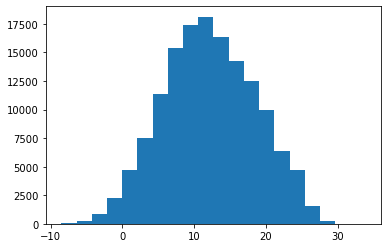

In [25]:
#replace the missing values in MinTemp with the mean values
#mean because the data for the MinTemp are symmetrical according to the histogram
plt.hist(weatherAUS['MinTemp'], bins = 20)
plt.show()
weatherAUS['MinTemp'].fillna(weatherAUS['MinTemp'].mean(), inplace=True)

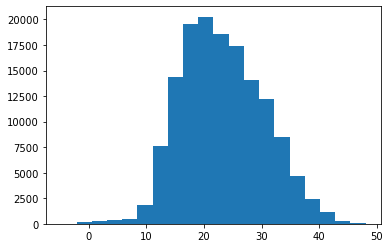

In [26]:
#replace the missing values in MaxTemp with the median values
#mean because the data for the MaxTemp is skewed
plt.hist(weatherAUS['MaxTemp'], bins = 20)
plt.show()
weatherAUS['MaxTemp'].fillna(weatherAUS['MaxTemp'].median(), inplace=True)

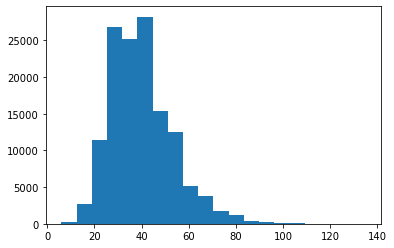

In [28]:
#replacing missing values with median because of skewed data
plt.hist(weatherAUS['WindGustSpeed'], bins = 20)
plt.show()
weatherAUS['WindGustSpeed'].fillna(weatherAUS['WindGustSpeed'].median(), inplace=True)

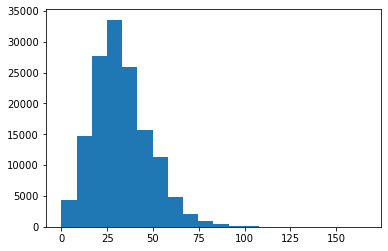

In [30]:
#replacing missing values with median because of skewed data
plt.hist(weatherAUS['WindSpeed'], bins = 20)
plt.show()
weatherAUS['WindSpeed'].fillna(weatherAUS['WindSpeed'].median(), inplace=True)

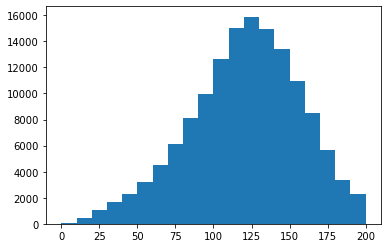

In [31]:
#replacing missing values with median because of skewed data
plt.hist(weatherAUS['Humidity'], bins = 20)
plt.show()
weatherAUS['Humidity'].fillna(weatherAUS['Humidity'].median(), inplace=True)

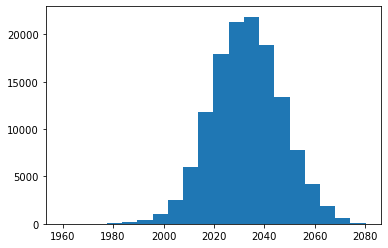

In [32]:
#replacing missing values with mean because of the symmetrical nature of the data
plt.hist(weatherAUS['Pressure'], bins = 20)
plt.show()
weatherAUS['Pressure'].fillna(weatherAUS['Pressure'].mean(), inplace=True)

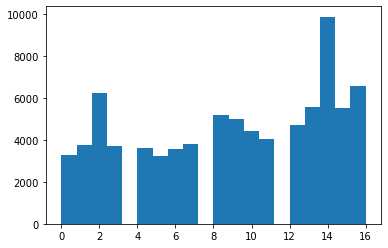

In [33]:
#replacing missing values with mean
plt.hist(weatherAUS['Cloud'], bins = 20)
plt.show()
weatherAUS['Cloud'].fillna(weatherAUS['Cloud'].mean(), inplace=True)

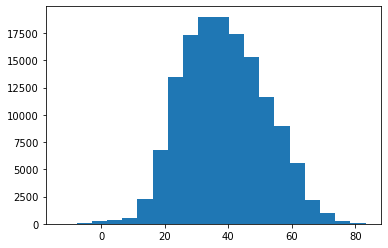

In [34]:
#replacing missing values with median because of the symmetrical nature of the data
plt.hist(weatherAUS['Temperature'], bins = 20)
plt.show()
weatherAUS['Temperature'].fillna(weatherAUS['Temperature'].mean(), inplace=True)

In [36]:
#Re arranging dataset
weatherAUS = weatherAUS[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed','Humidity','Pressure','Cloud','Temperature','RainToday','RainTomorrow']]
weatherAUS.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed,Humidity,Pressure,Cloud,Temperature,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,44.0,93.0,2014.8,8.974304,38.7,0.0,0.0
1,7.4,25.1,0.0,44.0,26.0,69.0,2018.4,8.974304,41.5,0.0,0.0
2,12.9,25.7,0.0,46.0,45.0,68.0,2016.3,8.974304,44.2,0.0,0.0
3,9.2,28.0,0.0,24.0,20.0,61.0,2030.4,8.974304,44.6,0.0,0.0
4,17.5,32.3,1.0,41.0,27.0,115.0,2016.8,15.000000,47.5,0.0,0.0


In [37]:
#Re checking if there are still missing values
weatherAUS.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed        0
Humidity         0
Pressure         0
Cloud            0
Temperature      0
RainToday        0
RainTomorrow     0
dtype: int64

<AxesSubplot:>

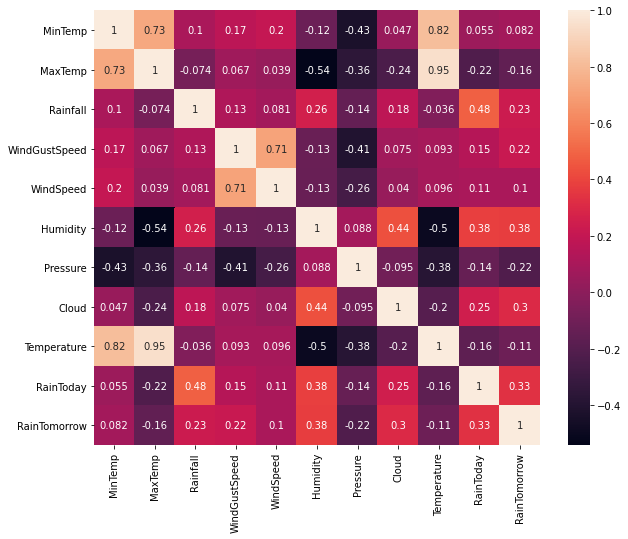

In [38]:
#visualizing the correlations between the remaining variables
corr = weatherAUS.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

In [ ]:
#saving dataframe to csv
weatherAUS1.to_csv('weatherAUSupdate.csv',index=False)

# Train a Logistic Regression Model

In [39]:
#separating the input variables/features from the output variable
features = weatherAUS.drop('RainTomorrow', axis=1)
labels = weatherAUS['RainTomorrow']

#splitting data into train set and test set
#60% was used as the train set and 40% as the test set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=0)

In [41]:
#function to format how results are printed
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [42]:
#setting up the logistic Regression model and searching for the best regularization parameter
lr = LogisticRegression(solver='liblinear')
parameters = { 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }# setting regularization values

cv = GridSearchCV(lr, parameters, cv=5) #set up a 5 cross-validation model
cv.fit(X_train, y_train.values.ravel()) #training the model
print_results(cv)

BEST PARAMS: {'C': 0.01}

0.823 (+/-0.004) for {'C': 0.001}
0.824 (+/-0.005) for {'C': 0.01}
0.823 (+/-0.005) for {'C': 0.1}
0.823 (+/-0.004) for {'C': 1}
0.823 (+/-0.004) for {'C': 10}
0.823 (+/-0.004) for {'C': 100}
0.823 (+/-0.004) for {'C': 1000}


In [43]:
#predict probablity of outcomes with the 60% training data. 
#first column is the probability of outcome being 0 and 1 for the second column
cv.predict_proba(X_train)

array([[0.95964615, 0.04035385],
       [0.57394519, 0.42605481],
       [0.70192874, 0.29807126],
       ...,
       [0.88541445, 0.11458555],
       [0.88647365, 0.11352635],
       [0.86298943, 0.13701057]])

In [44]:
cv.predict(X_train) #actual predicted values

array([0., 0., 0., ..., 0., 0., 0.])

In [45]:
#knowing the accuracy of the model
#80+ percent not too bad considering the massive dataset
cv.score(X_train,y_train) 

0.823445162473074

In [47]:
#confusion matrix revealing 63243 zeros predicted correctly,
# 3818 zeros predicted as one
# 11591 ones predicted as zeros and
# 8624 ones predicted correctly
confusion_matrix(y_train,cv.predict(X_train))

array([[63243,  3818],
       [11591,  8624]], dtype=int64)

In [49]:
#generating a classification report on the model
print(classification_report(y_train,cv.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89     67061
         1.0       0.69      0.43      0.53     20215

    accuracy                           0.82     87276
   macro avg       0.77      0.68      0.71     87276
weighted avg       0.81      0.82      0.81     87276



testing the model with the testing set

In [50]:
#probabilty of 0s and 1s to be predicited
cv.predict_proba(X_test)

array([[0.88452121, 0.11547879],
       [0.85148324, 0.14851676],
       [0.85213782, 0.14786218],
       ...,
       [0.85096345, 0.14903655],
       [0.53349105, 0.46650895],
       [0.84268932, 0.15731068]])

In [51]:
cv.predict(X_test) #actual predicted values

array([0., 0., 0., ..., 0., 0., 0.])

In [53]:
cv.score(X_test,y_test) # accuracy not too different from accuracy of training data

0.8229925752784271

In [54]:
confusion_matrix(y_test,cv.predict(X_test))

array([[42191,  2490],
       [ 7809,  5694]], dtype=int64)